<a href="https://colab.research.google.com/github/SANKEERTH-CV/IDS_PROJECT-SNGCET-FAKE_JOB_DETECTION/blob/main/Copy_of_Untitled5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

In [ ]:
df = pd.read_csv("fake_job_postings.csv", engine='python', on_bad_lines='skip', encoding='utf-8')
print("Rows loaded:", df.shape[0])
df.head()



Rows loaded: 16287


,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [ ]:
# Fill missing values
df = df.fillna('')

# Combine text features
df['text'] = (df['title'] + ' ' + df['company_profile'] + ' ' +
              df['description'] + ' ' + df['requirements'] + ' ' + df['benefits'])


/tmp/ipython-input-1052730596.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='fraudulent', data=df, palette='Set2')


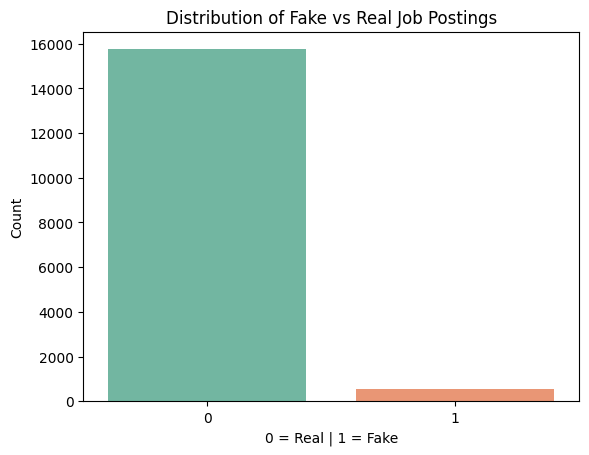

In [ ]:
sns.countplot(x='fraudulent', data=df, palette='Set2')
plt.title("Distribution of Fake vs Real Job Postings")
plt.xlabel("0 = Real | 1 = Fake")
plt.ylabel("Count")
plt.show()


/tmp/ipython-input-105558974.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='employment_type', data=df, order=df['employment_type'].value_counts().index, palette='cool')


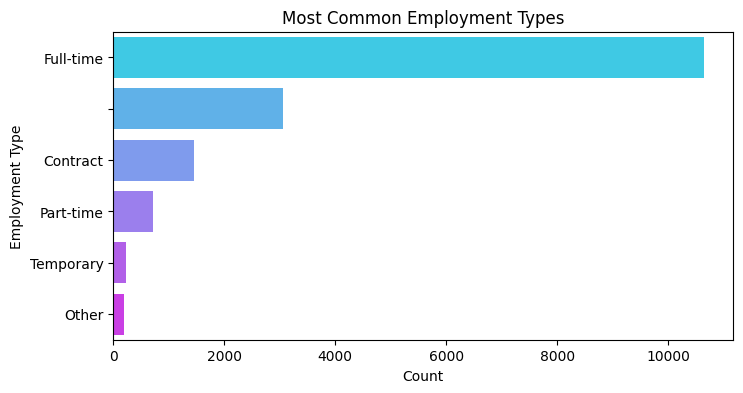

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(y='employment_type', data=df, order=df['employment_type'].value_counts().index, palette='cool')
plt.title("Most Common Employment Types")
plt.xlabel("Count")
plt.ylabel("Employment Type")
plt.show()


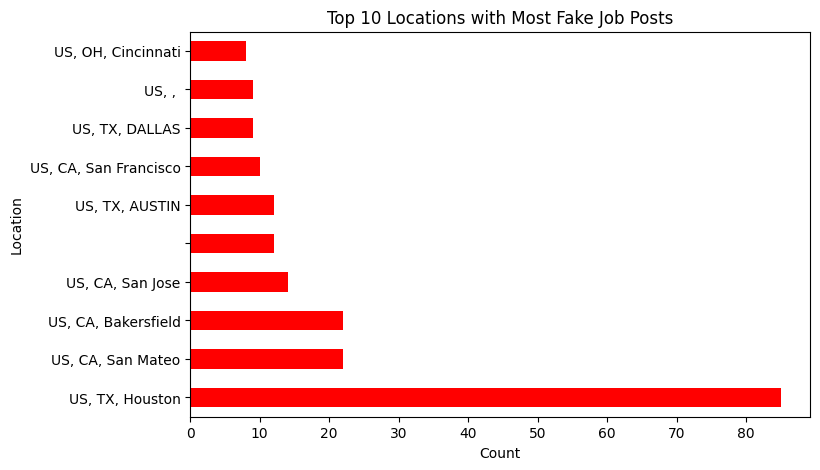

In [ ]:
fake_jobs = df[df['fraudulent'] == 1]['location'].value_counts().head(10)
fake_jobs.plot(kind='barh', color='red', figsize=(8,5))
plt.title("Top 10 Locations with Most Fake Job Posts")
plt.xlabel("Count")
plt.ylabel("Location")
plt.show()


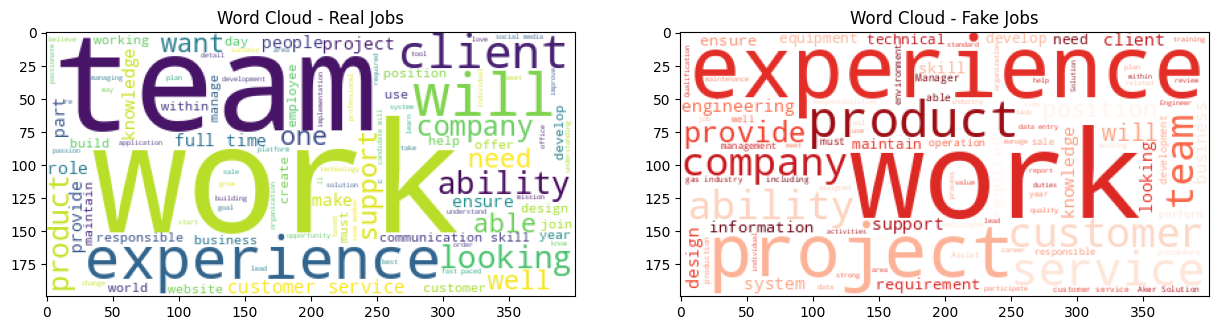

In [ ]:
real_jobs = ' '.join(df[df['fraudulent']==0]['text'])
fake_jobs = ' '.join(df[df['fraudulent']==1]['text'])

plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.imshow(WordCloud(stopwords=STOPWORDS, background_color='white').generate(real_jobs))
plt.title("Word Cloud - Real Jobs")

plt.subplot(1,2,2)
plt.imshow(WordCloud(stopwords=STOPWORDS, background_color='white', colormap='Reds').generate(fake_jobs))
plt.title("Word Cloud - Fake Jobs")
plt.show()


In [ ]:
tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)
X = tfidf.fit_transform(df['text'])
y = df['fraudulent']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)


LogisticRegression(max_iter=200)

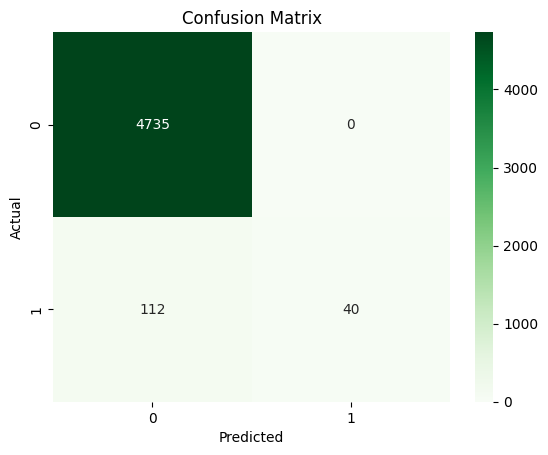

In [ ]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
print(classification_report(y_test, y_pred))

NameError: name 'classification_report' is not defined